Titanic - Machine Learning from Disaster

In [84]:
import numpy as np
import pandas as pd

In [85]:
#df : dataframe.
df_train = pd.read_csv("./Titanic_Project_Information_Data/train.csv")
df_test = pd.read_csv("./Titanic_Project_Information_Data/test.csv")

In [86]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [87]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [88]:
df_train = pd.read_csv("./Titanic_Project_Information_Data/train.csv", index_col="PassengerId")
df_train.head()
df_train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [89]:
conv_train_features = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_train_categorical(df, feature):
    for feature in conv_train_features:
        df[feature] = df[feature].astype("category")

convert_train_categorical(df_train, conv_train_features)

In [90]:
df_test = pd.read_csv("./Titanic_Project_Information_Data/test.csv", index_col="PassengerId")
df_test.head()
df_test.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [91]:
conv_test_features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_test_categorical(df, feature):
    for feature in conv_test_features:
        df[feature] = df[feature].astype("category")

convert_test_categorical(df_test, conv_test_features)

In [92]:
df_train.describe()
df_train.describe(include="category")

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


Exploratory Data Analysis - EDA for Categorical : Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch

In [93]:
df_train["Survived"].value_counts().to_frame()
df_train["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


In [94]:
df_train["Sex"].value_counts().to_frame()
df_train["Sex"].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

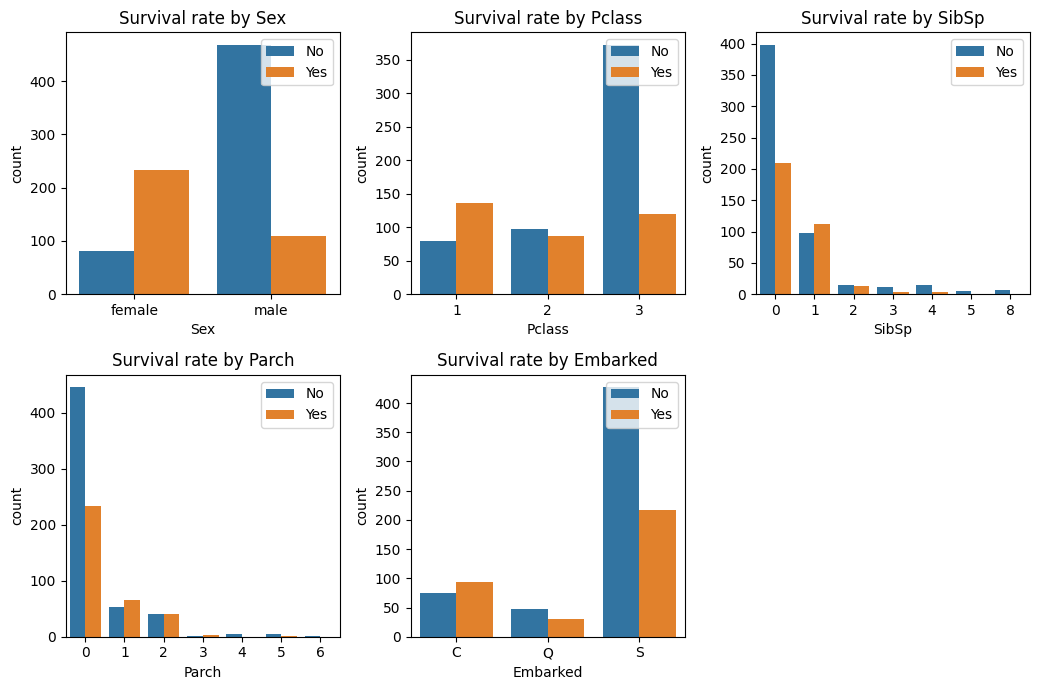

In [96]:
colums = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
rows = 2
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols*3.5, rows*3.5))
for r_row in range(rows):
    for c_col in range(cols):
        i = r_row * cols + c_col
        if i < len(colums):
            ax_i = axs[r_row, c_col]
            sns.countplot(data=df_train, x=colums[i], hue="Survived", ax=ax_i)
            ax_i.set_title(f"Survival rate by {colums[i]}")
            ax_i.legend(title="", loc="upper right", labels=["No", "Yes"])

axs.flat[-1].set_visible(False) # Hide the last subplot.
plt.tight_layout()              # Adjust the layout.
plt.show()   

Exploratory Data Analysis - EDA for Numerical : (continuous) Age, Fare

<Axes: xlabel='Age', ylabel='Count'>

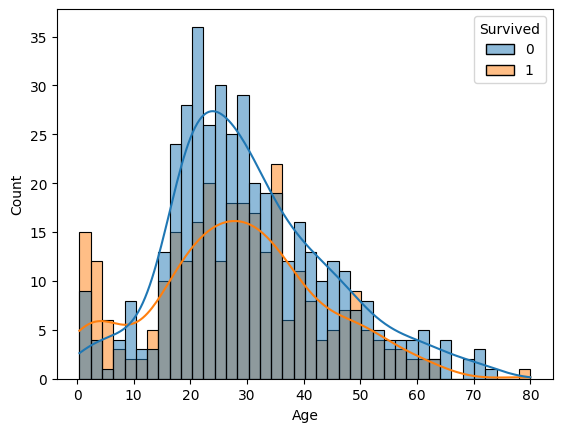

In [97]:
sns.histplot(data=df_train, x="Age", bins=40, hue="Survived", kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

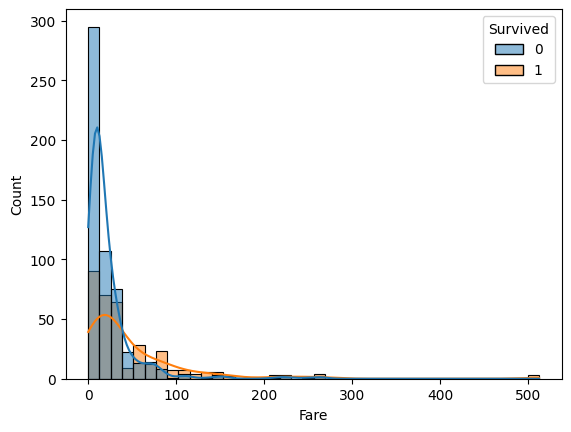

In [98]:
sns.histplot(data=df_train, x="Fare", bins=40, hue="Survived", kde=True)

<Axes: xlabel='Fare', ylabel='count'>

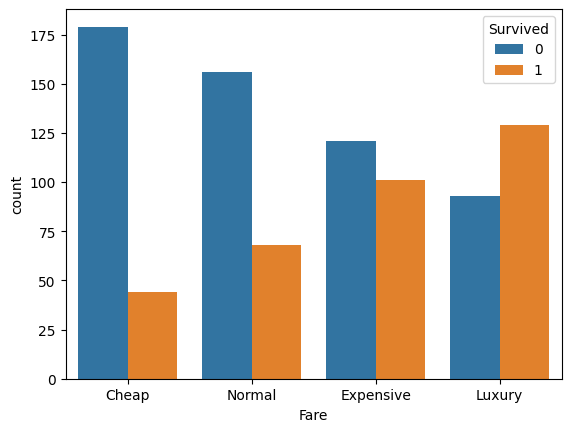

In [99]:
categories_fare = ["Cheap", "Normal", "Expensive", "Luxury"]
pd.qcut(df_train["Fare"], q=4, labels=categories_fare)

sns.countplot(x=pd.qcut(df_train["Fare"], q=4, labels=categories_fare), hue="Survived", data=df_train)

Feature Engineering & Data Wrangling

Feature Engineering - PassengerID(Name)


In [100]:
import re
df_train["Name"].tail(10)

def title_extract(name):
    title = re.compile(r",([\w\s]+)\.") # Extract the title from the name.
    return title.search(name).group(1).strip()

df_train["Title"]=df_train["Name"].apply(lambda name: title_extract(name))
df_train["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [101]:
df_test["Title"]=df_test["Name"].apply(lambda name: title_extract(name))
df_test["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

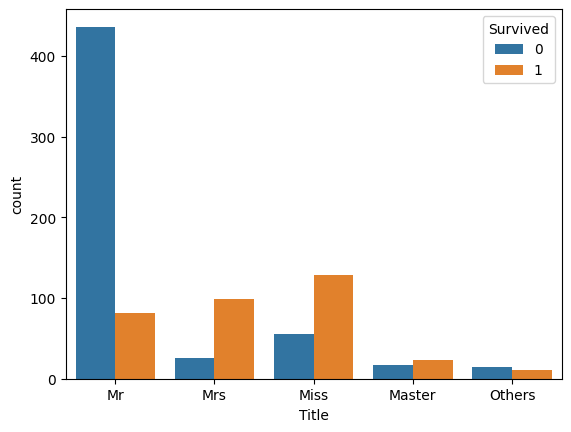

In [102]:
# group các title lại với nhau để giảm số lượng title.
def title_group(title):
    if title in ["Mr", "Miss", "Mrs", "Master"]:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

df_train["Title"]=df_train["Title"].apply(lambda title: title_group(title))
df_test["Title"]=df_test["Title"].apply(lambda title: title_group(title))

df_train["Title"].value_counts()
df_test["Title"].value_counts()

sns.countplot(data=df_train, x="Title", hue="Survived")

Feature Engineering - Family(SibSp, Parch)

<Axes: xlabel='FamilyCate', ylabel='count'>

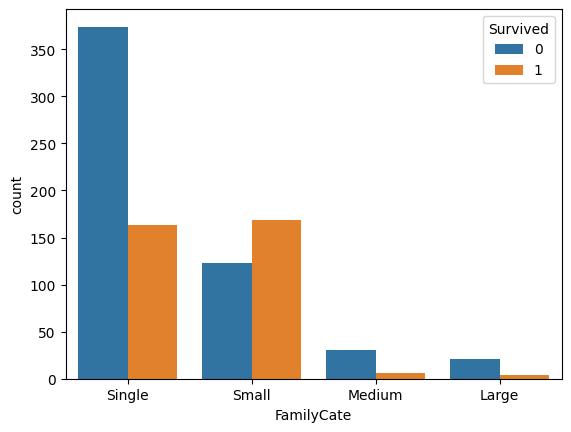

In [103]:
df_train["FamilySize"] = df_train["SibSp"].astype(int) + df_train["Parch"].astype(int) + 1
df_test["FamilySize"] = df_test["SibSp"].astype(int) + df_test["Parch"].astype(int) + 1

df_train["FamilyCate"]=pd.cut(df_train["FamilySize"], bins=[0, 1, 4, 6, 20], labels=["Single", "Small", "Medium", "Large"])
df_test["FamilyCate"]=pd.cut(df_test["FamilySize"], bins=[0, 1, 4, 6, 20], labels=["Single", "Small", "Medium", "Large"])
sns.countplot(data=df_train, x="FamilyCate", hue="Survived")

Data Wrangling - Data Cleaning
- Feature Numerical : Age, Fare
- Feature Categorical : Sex, Pclass, Embarked, [Title(Name), FamilyCate(SibSp, Parch)] - Created in Feature Engineering

In [104]:
numerical_features = ["Age", "Fare"]
categorical_features = ["Sex", "Pclass", "Embarked", "Title", "FamilyCate"]
columns_features = numerical_features + categorical_features
print(columns_features)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'FamilyCate']


In [105]:
def check_missing(df, columns_features):
    for column in columns_features:
        count_missing = df[column].isnull().sum()
        if count_missing > 0:
            print(f"{column}: {count_missing} missing value(s) - {count_missing/len(df)*100:.2f}%")
          
check_missing(df_train, columns_features)
check_missing(df_test, columns_features)

Age: 177 missing value(s) - 19.87%
Embarked: 2 missing value(s) - 0.22%
Age: 86 missing value(s) - 20.57%
Fare: 1 missing value(s) - 0.24%


Tìm sự tương đồng giữa Age và cột dữ liệu khác, filling missing values  với median groupby

In [106]:
age_by_sex_Pclass = df_train.groupby(["Sex", "Pclass"])["Age"].median().to_frame()
age_by_sex_Pclass

C:\Users\910ho\AppData\Local\Temp\ipykernel_29212\671254893.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_Pclass = df_train.groupby(["Sex", "Pclass"])["Age"].median().to_frame()


Age
Sex    Pclass      
female 1       35.0
       2       28.0
       3       21.5
male   1       40.0
       2       30.0
       3       25.0

In [107]:
df_train["Age"]=df_train.groupby(["Sex", "Pclass"], observed=True)["Age"].transform(lambda x: x.fillna(x.median())).to_frame()
df_test["Age"]=df_test.groupby(["Sex", "Pclass"], observed=True)["Age"].transform(lambda x: x.fillna(x.median())).to_frame()

In [108]:
check_missing(df_train, columns_features)
check_missing(df_test, columns_features)

Embarked: 2 missing value(s) - 0.22%
Fare: 1 missing value(s) - 0.24%


Tách Dataframe_Train → X : Feature Columns & Y : Survived Column

In [109]:
X_train = df_train[columns_features]
Y_train = df_train["Survived"]

In [110]:
X_test = df_test[columns_features]

Embarked, Fare - Preprocess Pipeline

In [111]:
# OneHotEncoder: encode categorical features as a one-hot numeric array.
# StandardScaler: standardize features by removing the mean and scaling to unit variance.
# SimpleImputer: impute missing values.
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline: fill missing values, standardize features, and encode categorical features.
from sklearn.pipeline import Pipeline

numer_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cate_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [112]:
# ColumnTransformer: apply different transformers to different columns.
from sklearn.compose import ColumnTransformer

# define the preprocessor for numerical and categorical features.
preprocessor = ColumnTransformer(transformers=[("numer", numer_transformer, numerical_features),
                                               ("cate", cate_transformer, categorical_features)])

In [113]:
# Fit the preprocessor to the training data with X_train.
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cate',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'FamilyCate'])])

In [114]:
# Transform the training data.
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

Model Training

In [115]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation data.
X_for_train, X_for_val, Y_for_train, Y_for_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [116]:
X_for_train.shape, X_for_val.shape, X_test.shape

((712, 19), (179, 19), (418, 19))

Model 1 : Binary Classification - Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

In [118]:
logistic_reg=LogisticRegression(solver="liblinear", max_iter=1000)
logistic_reg.fit(X_for_train, Y_for_train)
logistic_reg.score(X_for_train, Y_for_train)

0.8314606741573034

In [119]:
# Predict the validation data and evaluate the model.
y_pred = logistic_reg.predict(X_for_val)
precision_score(Y_for_val, y_pred), recall_score(Y_for_val, y_pred), f1_score(Y_for_val, y_pred), accuracy_score(Y_for_val, y_pred)
print(classification_report(Y_for_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.76      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Model 2 : Binary Classification - Polynomial Features

In [120]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2) #degree=2: tạo ra các feature bậc 2.
poly_features_Xtrain = poly.fit_transform(X_train)
poly_features_Xval = poly.fit_transform(X_for_val)

In [121]:
poly_log_reg = LogisticRegression(solver="liblinear", max_iter=1000)
poly_log_reg.fit(poly_features_Xtrain, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [122]:
poly_log_reg.score(poly_features_Xtrain, Y_train)

0.8552188552188552

In [123]:
# Predict the validation data and evaluate the model.
y_pred = poly_log_reg.predict(poly_features_Xval)
precision_score(Y_for_val, y_pred), recall_score(Y_for_val, y_pred), f1_score(Y_for_val, y_pred), accuracy_score(Y_for_val, y_pred)
print(classification_report(Y_for_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       110
           1       0.86      0.74      0.80        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



Model 3 : Binary Classification - Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
decision_tree.fit(X_for_train, Y_for_train)
decision_tree.score(X_for_train, Y_for_train)

0.8693820224719101

In [126]:
# Predict the validation data and evaluate the model.
y_pred = decision_tree.predict(X_for_val)
precision_score(Y_for_val, y_pred), recall_score(Y_for_val, y_pred), f1_score(Y_for_val, y_pred), accuracy_score(Y_for_val, y_pred)
print(classification_report(Y_for_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



Model 4 : Cross Validation k-Fold

In [127]:
from sklearn.model_selection import cross_val_score

# Cross-validation: evaluate the model.
logistic_reg_cross_val = LogisticRegression(solver="liblinear", max_iter=1000)
decision_tree_cross_val = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=0)

logistic_reg_scores = cross_val_score(logistic_reg_cross_val, X_train, Y_train, cv=5, scoring="accuracy")
logistic_reg_scores.mean(), logistic_reg_scores.std()

(0.826031008725127, 0.020466357172416235)

In [128]:
decision_tree_scores = cross_val_score(decision_tree_cross_val, X_train, Y_train, cv=5, scoring="accuracy")
decision_tree_scores.mean(), decision_tree_scores.std()

(0.8047517418868873, 0.0191344302742655)

In [129]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_for_train, Y_for_train)
decision_tree.score(X_for_train, Y_for_train)

0.9831460674157303